In [1]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

[Baixar base do yahoo](http://127.0.0.1:8888/notebooks/trades/pairs_trading_b3/utils/Historic-Yahoo.ipynb)

In [2]:
def plot_pairs(pairs, data, period_ext=None):
    counter=-1
    for i, row in pairs.iterrows():
        counter+=1
        print(counter)
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext
        mult.plot_residue3(data, y_symbol, x_symbol, period)

def lot_short_cash_neutral(price_long, price_short, lot_long):
    return roundup((price_long*lot_long)/price_short)

def roundup(value):
    #return int(math.ceil(value / 100.0)) * 100
    ret = int(round(value, -2))
    if (ret <= 0):
        return 100
    return ret

def parameters_input_cash_neutral(pairs, data, lot=100):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        signalStr = row['SignalStr'].split('/')

        y_price = data[y_symbol][0]
        x_price = data[x_symbol][0]

        y_lot = 0
        x_lot = 0
        if (signalStr[0]=='Long'):
            x_lot = lot_short_cash_neutral(y_price, x_price, lot)
            y_lot = lot
        else:
            y_lot = lot_short_cash_neutral(x_price, y_price, lot)
            x_lot = lot

        print('{}: {} ({}) {} <-> {}: {} ({}) {}'.format(\
            signalStr[0], y_symbol, round(y_price, 2), y_lot, signalStr[1], x_symbol, round(x_price, 2), x_lot))
        
def check_coint(pairs, data):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
        print('{}/{}, {}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary'], check['adf']))

In [3]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [4]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-08-27
data: (331, 72)
pairs: (2137, 12)


In [5]:
#data.to_excel('datasets/data_cart.xlsx')

In [6]:
#pairs

In [7]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 2) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,IGTA3,LREN3,-5.868259,99,0.752046,2.347400,1,Long/Short,0.727636,9,"100,120,140,160,180,200,220,240,250"
1,100,B3SA3,ELET3,-4.613901,99,1.239296,2.254880,2,Long/Short,0.536953,9,"100,120,140,160,180,200,220,240,250"
2,100,EGIE3,LREN3,-4.494002,99,0.329581,2.048731,2,Long/Short,0.455431,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [8]:
#plot_pairs(pairs_signal, data)
#mult.plot_residue(mult.residue(data['HAPV3'], data['IRBR3'], 100))

In [9]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [10]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [11]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,IGTA3,LREN3,-5.868259,99,0.752046,2.347400,1,Long/Short,0.727636,9,"100,120,140,160,180,200,220,240,250"
1,100,B3SA3,ELET3,-4.613901,99,1.239296,2.254880,2,Long/Short,0.536953,9,"100,120,140,160,180,200,220,240,250"
2,100,EGIE3,UGPA3,-4.622460,99,0.729987,2.321470,2,Long/Short,0.518659,9,"100,120,140,160,180,200,220,240,250"
3,100,GGBR4,VIVT4,-4.384355,99,0.063620,2.170817,2,Short/Long,0.212726,9,"100,120,140,160,180,200,220,240,250"
4,100,EGIE3,EMBR3,-5.253019,99,0.673937,2.117169,2,Long/Short,0.324547,9,"100,120,140,160,180,200,220,240,250"
5,100,ENGI11,GNDI3,-4.829187,99,0.557605,2.022712,2,Long/Short,0.500966,9,"100,120,140,160,180,200,220,240,250"
6,100,ABEV3,BPAC11,-4.891320,99,0.070160,2.305211,2,Long/Short,0.641191,9,"100,120,140,160,180,200,220,240,250"


In [12]:
"""new = pairs_signal.iloc[[0,1]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"new = pairs_signal.iloc[[0,1]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [13]:
#oper.to_csv('datasets/operations.csv', index=False)

In [14]:
check_coint(oper, data)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


IGTA3/LREN3, 100, True, 99
B3SA3/ELET3, 100, True, 99
EGIE3/UGPA3, 100, True, 99


KeyError: 'VIVT4'

0


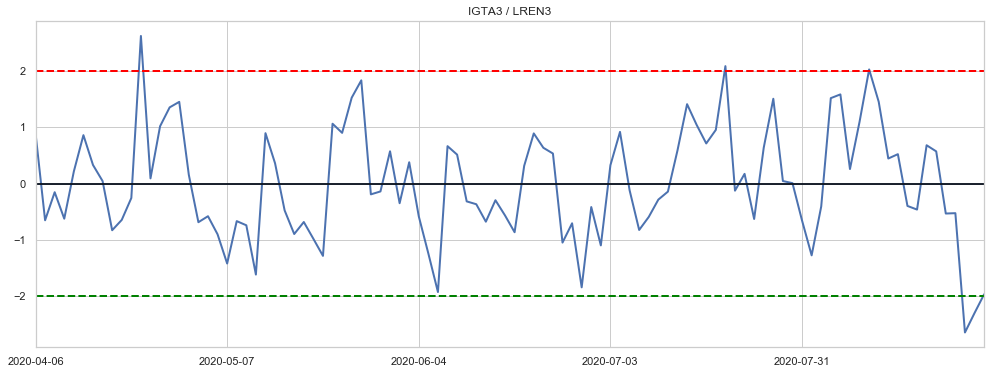

1


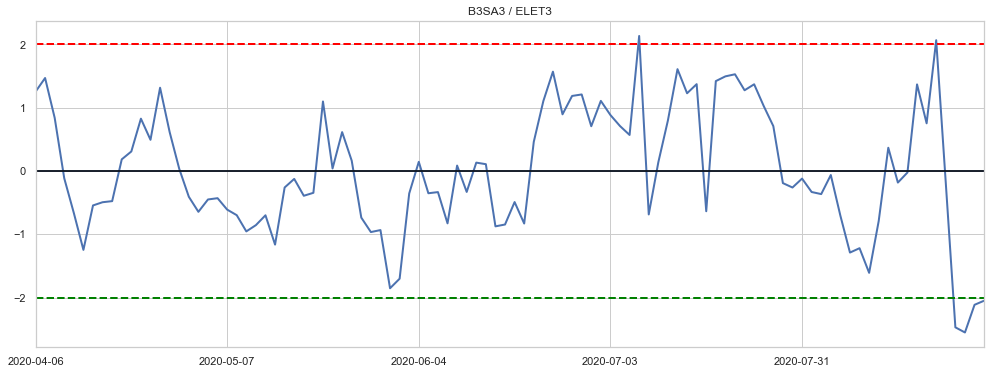

2


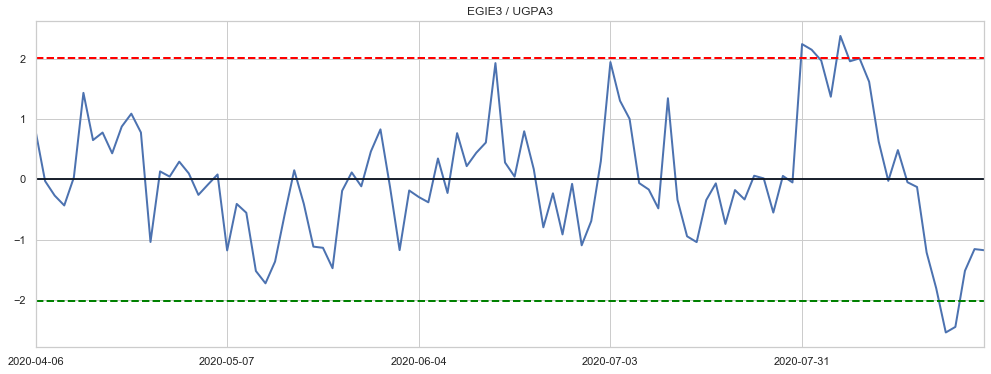

3


KeyError: 'VIVT4'

In [15]:
plot_pairs(oper, data)

In [ ]:
#df.to_excel('datasets/data_cart.xlsx')

In [ ]:
parameters_input_cash_neutral(oper, data)

In [ ]:
"""
EGIE3-UGPA3
GGBR4-VIVT4
RADL3-UGPA3
"""